# Red Wine Quality Prediction

## DecisionTreeClassifier

In [1]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as snsRed Wine Quality Prediction

import warnings
warnings.filterwarnings('ignore')


In [2]:
#import dataset
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# checking unique values present 
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
#replacing 3 to 0
data['quality']=data['quality'].replace(3,0)

In [5]:
#replacing 4 to 0
data['quality']=data['quality'].replace(4,0)

In [6]:
#replacing 5 to 0
data['quality']=data['quality'].replace(5,0)

In [7]:
#replacing 6 to 0
data['quality']=data['quality'].replace(6,0)

In [8]:
#replacing 7 to 1
data['quality']=data['quality'].replace(7,1)

In [9]:
#replacing 8 to 1
data['quality']=data['quality'].replace(8,1)

In [10]:
data['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

In [11]:
# seperate label n feature
X=data.drop('quality' , axis=1)
y=data.quality

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [13]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({0: 1043, 1: 156})

In [14]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE


In [15]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({0: 1043, 1: 156})
the number of classes after fit:  Counter({0: 1043, 1: 782})


In [16]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [17]:
data.shape

(1599, 12)

In [18]:
#describe dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [19]:
# checking null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
#observations
# 1) there is no null values present in dataset
# 2) there is no problem in dataset 
# 3) residual sugar and total sulfur dioxide i suspect some skewness we will see

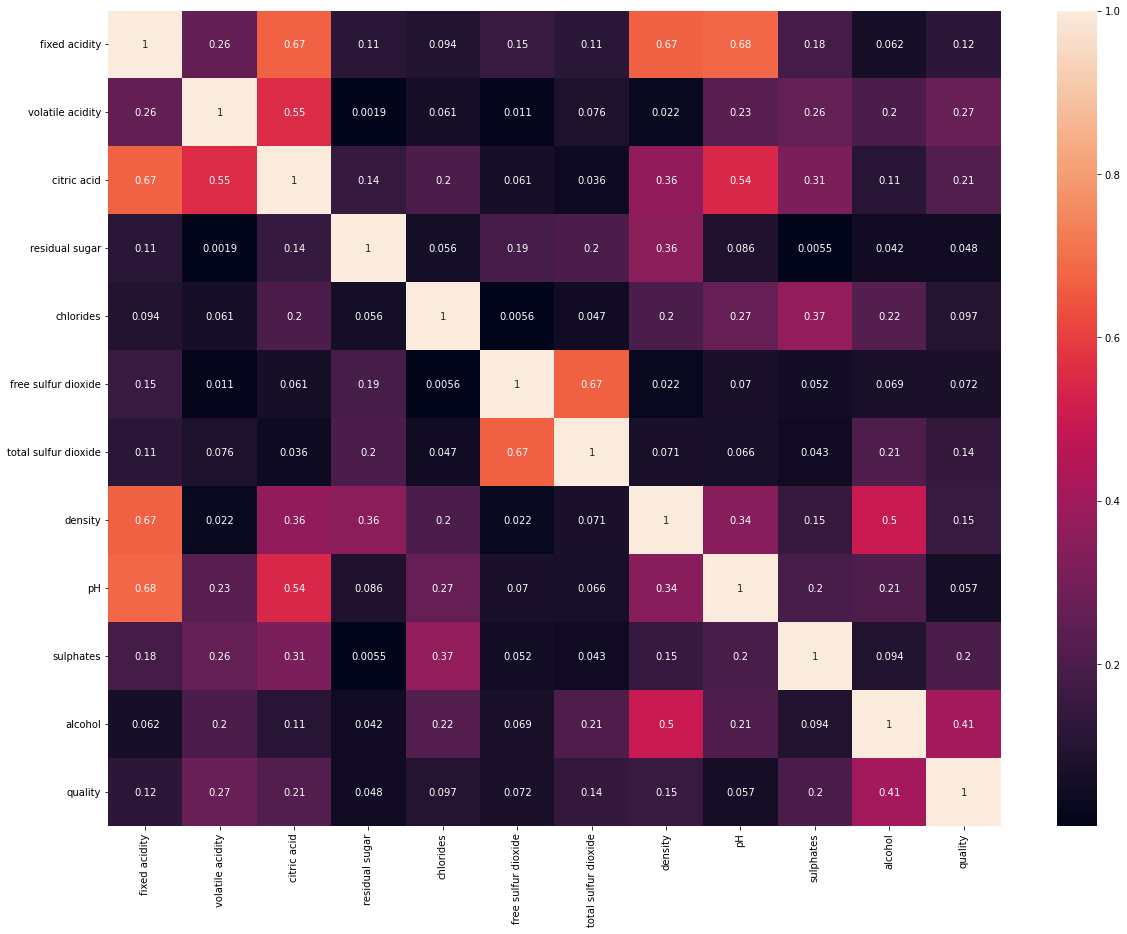

In [21]:
# find relationship between feature vs feature and feature vs label by using new technique that is heatmap

# we can use heatmap to see that problem has multicollinearity problem exist or not

df_corr = data.corr().abs() #this code will give coefficient of one variable vs all other feature (relationship will all)

plt.figure(figsize=(20,15))
sns.heatmap (df_corr , annot = True , annot_kws={'size' : 10}) # df_corr = graph , annot=number inside box , annot_kws=size of number inside box
plt.show()

In [22]:
#1)  now in heatmap here we see all relationship featue vs feature and feature vs label
#2) darker is less reationship and lighter is higher relation ship
#3) for multicollinerity we have to take higher relationship ,,  
#4)for example i assume more than 75% relationship then there is multicollinear can be exist im basically suspecting 
#5) after seeing all the data there is no such multicollinear problem exist so going forward

In [23]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8675 RandomState 1


MAXINING TESTING SCORE 0.8675 ON RANDOM STATE OF 1
Testing Accuracy 0.8475 RandomState 2


Testing Accuracy 0.895 RandomState 3


MAXINING TESTING SCORE 0.895 ON RANDOM STATE OF 3
Testing Accuracy 0.8725 RandomState 4


Testing Accuracy 0.8725 RandomState 5


Testing Accuracy 0.895 RandomState 6


Testing Accuracy 0.84 RandomState 7


Testing Accuracy 0.8625 RandomState 8


Testing Accuracy 0.89 RandomState 9


Testing Accuracy 0.8375 RandomState 10


Testing Accuracy 0.8875 RandomState 11


Testing Accuracy 0.8725 RandomState 12


Testing Accuracy 0.885 RandomState 13


Testing Accuracy 0.8825 RandomState 14


Testing Accuracy 0.8925 RandomState 15


Testing Accuracy 0.8725 RandomState 16


Testing Accuracy 0.8575 RandomState 17


Testing Accuracy 0.8875 RandomState 18


Testing Accuracy 0.8675 RandomState 19


Testing Accuracy 0.88 RandomState 20


Testing Accuracy 0.885 RandomState 21


Testing Accuracy 0.88 RandomState 22


Testing Accuracy 0

In [24]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.91 On Random State 78


In [25]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=78)

In [26]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [27]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [28]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 89.500000%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.94      0.94      0.94       338
           1       0.67      0.65      0.66        62

    accuracy                           0.90       400
   macro avg       0.80      0.79      0.80       400
weighted avg       0.89      0.90      0.89       400



In [29]:
# Training score for Decision Tree Classifier 100.000000%
# Testing score for Decision Tree Classifier 89.500000%

## Hyperparameter Tuning fot Decision Tree

In [30]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [31]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [32]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [33]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [36]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 20, min_samples_leaf= 1, min_samples_split= 5)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=20, min_samples_split=5)

In [37]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 98.165138%
====Testing Score====
Accuracy score : 90.250000%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.93      0.96      0.94       338
           1       0.73      0.60      0.65        62

    accuracy                           0.90       400
   macro avg       0.83      0.78      0.80       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
# Training Score after Hyperparameter Tuning is 98.165138%
# Testing Score after Hyperparameter Tuning is 90.250000%

# RandomForestClassifier

In [38]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [39]:
#import dataset
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
# checking unique values present 
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [41]:
#replacing 3 to 0
data['quality']=data['quality'].replace(3,0)
#replacing 4 to 0
data['quality']=data['quality'].replace(4,0)
#replacing 5 to 0
data['quality']=data['quality'].replace(5,0)
#replacing 6 to 0
data['quality']=data['quality'].replace(6,0)
#replacing 7 to 1
data['quality']=data['quality'].replace(7,1)
#replacing 8 to 1
data['quality']=data['quality'].replace(8,1)

In [42]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [43]:
# seperate label n feature
X=data.drop('quality' , axis=1)
y=data.quality

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [45]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({0: 1043, 1: 156})

In [46]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE

In [47]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({0: 1043, 1: 156})
the number of classes after fit:  Counter({0: 1043, 1: 782})


In [48]:
data.shape

(1599, 12)

In [49]:
#describe dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [50]:
# checking null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [51]:
#observations
# 1) there is no null values present in dataset
# 2) there is no problem in dataset 
# 3) residual sugar and total sulfur dioxide i suspect some skewness we will see

In [52]:
# from scipy import stats

from scipy.stats import zscore

In [53]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3 ).all(axis=1)

data = data[filtering_entry]

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,0.137860
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.344871
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,0.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,0.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,1.000000


In [55]:
data.shape

(1458, 12)

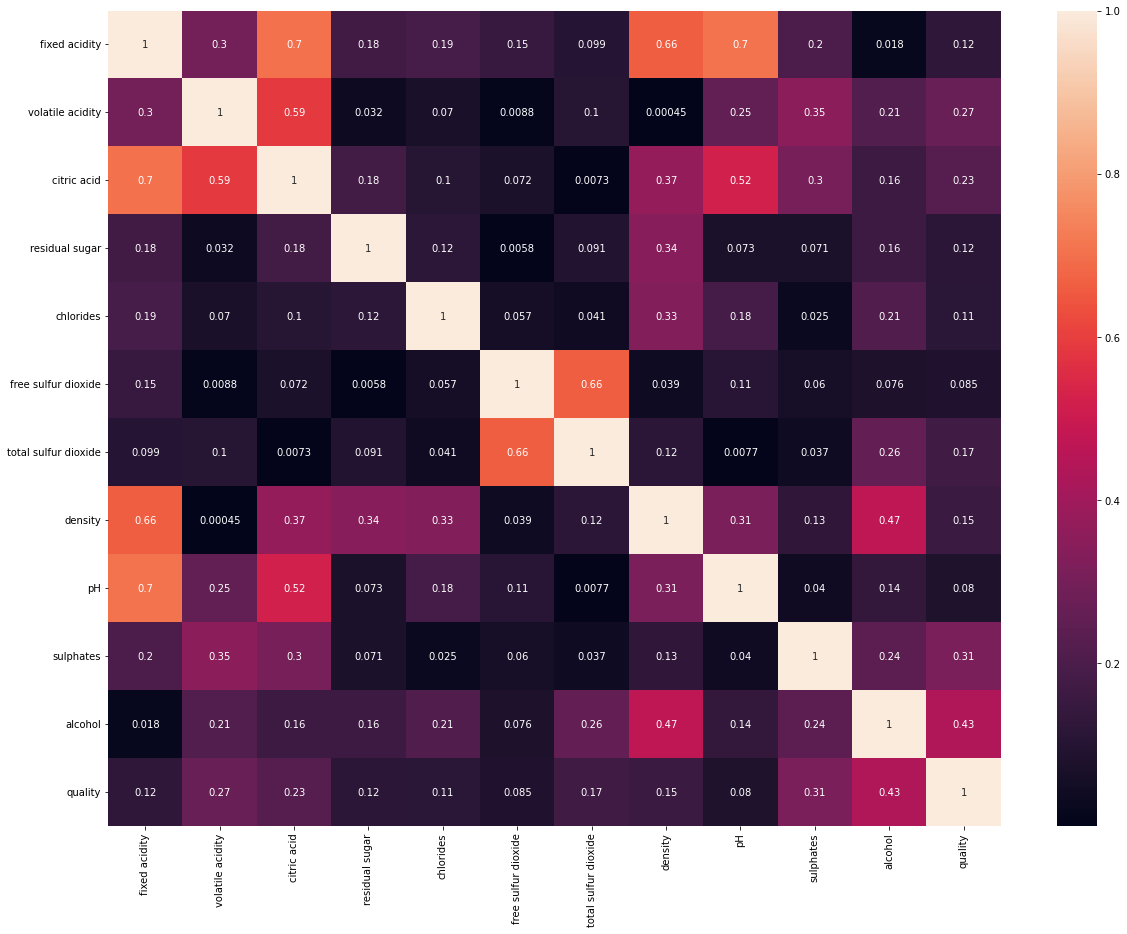

In [59]:
# check for multicollinarity problem exist or not using heat map

df_corr = data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap (df_corr , annot = True , annot_kws = {'size':10}
            )
plt.show()

In [58]:
#1)  now in heatmap here we see all relationship featue vs feature and feature vs label
#2) darker is less reationship and lighter is higher relation ship
#3) for multicollinerity we have to take higher relationship ,,  
#4)for example i assume more than 75% relationship then there is multicollinear can be exist im basically suspecting 
#5) after seeing all the data there is no such multicollinear problem exist so going forward

In [65]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.865 RandomState 1


MAXINING TESTING SCORE 0.865 ON RANDOM STATE OF 1
Testing Accuracy 0.8525 RandomState 2


Testing Accuracy 0.905 RandomState 3


MAXINING TESTING SCORE 0.905 ON RANDOM STATE OF 3
Testing Accuracy 0.8875 RandomState 4


Testing Accuracy 0.8675 RandomState 5


Testing Accuracy 0.89 RandomState 6


Testing Accuracy 0.845 RandomState 7


Testing Accuracy 0.865 RandomState 8


Testing Accuracy 0.8775 RandomState 9


Testing Accuracy 0.845 RandomState 10


Testing Accuracy 0.89 RandomState 11


Testing Accuracy 0.875 RandomState 12


Testing Accuracy 0.87 RandomState 13


Testing Accuracy 0.88 RandomState 14


Testing Accuracy 0.8875 RandomState 15


Testing Accuracy 0.8775 RandomState 16


Testing Accuracy 0.8625 RandomState 17


Testing Accuracy 0.865 RandomState 18


Testing Accuracy 0.8675 RandomState 19


Testing Accuracy 0.87 RandomState 20


Testing Accuracy 0.8775 RandomState 21


Testing Accuracy 0.895 RandomState 22


Testing Accuracy 0.8825 R

In [66]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9125 On Random State 83


In [67]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=83)

In [68]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [69]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [70]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 90.750000%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.92      0.98      0.95       340
           1       0.79      0.52      0.63        60

    accuracy                           0.91       400
   macro avg       0.86      0.75      0.79       400
weighted avg       0.90      0.91      0.90       400



## Hyperparameter Tuning for  Random Forest

In [71]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [73]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [74]:
#pass dataset to train 
grd.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [75]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 3}


In [90]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'entropy', max_depth = 30, min_samples_leaf= 2, min_samples_split= 5,n_estimators= 50)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50)

In [91]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 98.748957%
====Testing Score====
Accuracy score : 90.000000%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.91      0.98      0.94       340
           1       0.78      0.47      0.58        60

    accuracy                           0.90       400
   macro avg       0.84      0.72      0.76       400
weighted avg       0.89      0.90      0.89       400



In [92]:
# Training Score for Random Forest after hyperparameter is 98.748957%
# Testing Score for Random Forest after hyperparameter is 90.000000%

# Support Vector Machine (SVC)

In [93]:
# Import necessary model #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# svc model 
# for classification
from sklearn.svm import SVC

In [94]:
#import dataset
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [95]:
# checking unique values present 
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [96]:
#replacing 3 to 0
data['quality']=data['quality'].replace(3,0)
#replacing 4 to 0
data['quality']=data['quality'].replace(4,0)
#replacing 5 to 0
data['quality']=data['quality'].replace(5,0)
#replacing 6 to 0
data['quality']=data['quality'].replace(6,0)
#replacing 7 to 1
data['quality']=data['quality'].replace(7,1)
#replacing 8 to 1
data['quality']=data['quality'].replace(8,1)

In [97]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [98]:
# seperate label n feature
X=data.drop('quality' , axis=1)
y=data.quality

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

In [100]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({0: 1043, 1: 156})

In [101]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE

In [102]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({0: 1043, 1: 156})
the number of classes after fit:  Counter({0: 1043, 1: 782})


In [103]:
data.shape

(1599, 12)

In [104]:
#describe dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [105]:
# checking null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [106]:
#observations
# 1) there is no null values present in dataset
# 2) there is no problem in dataset 
# 3) residual sugar and total sulfur dioxide i suspect some skewness we will see

In [107]:
# from scipy import stats

from scipy.stats import zscore

In [108]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3 ).all(axis=1)

data = data[filtering_entry]

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,0.137860
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.344871
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,0.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,0.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,1.000000


In [109]:
data.shape

(1458, 12)

In [110]:
# scale x data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
pca=PCA()
pca.fit_transform(X_scaled)   # here you will get eighen values

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.40430898,
         0.77943963, -0.44978056]])

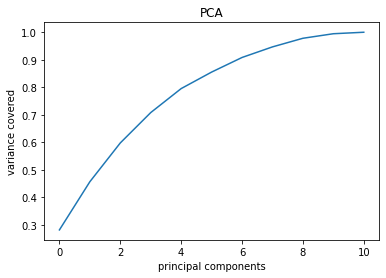

In [112]:
# lets plot scree plot to check the best components to select
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [113]:
# after looking into graph around 9 principal components are able to cover more than 95% of data and it is acceptable to loose less than 5% of data so selecting (9pc)

In [114]:
#selecting pc=9
pca=PCA(n_components=9)
new_pcomp=pca.fit_transform(X_scaled)
principal_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
principal_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098
...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248


In [127]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    svc=SVC()
    svc.fit(X_train_ns,y_train_ns)
    
    y_pred=svc.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.89 RandomState 1


MAXINING TESTING SCORE 0.89 ON RANDOM STATE OF 1
Testing Accuracy 0.87 RandomState 2


Testing Accuracy 0.875 RandomState 3


Testing Accuracy 0.8725 RandomState 4


Testing Accuracy 0.85 RandomState 5


Testing Accuracy 0.8925 RandomState 6


MAXINING TESTING SCORE 0.8925 ON RANDOM STATE OF 6
Testing Accuracy 0.8725 RandomState 7


Testing Accuracy 0.88 RandomState 8


Testing Accuracy 0.8875 RandomState 9


Testing Accuracy 0.8525 RandomState 10


Testing Accuracy 0.8525 RandomState 11


Testing Accuracy 0.88 RandomState 12


Testing Accuracy 0.8625 RandomState 13


Testing Accuracy 0.8525 RandomState 14


Testing Accuracy 0.88 RandomState 15


Testing Accuracy 0.8825 RandomState 16


Testing Accuracy 0.8775 RandomState 17


Testing Accuracy 0.855 RandomState 18


Testing Accuracy 0.84 RandomState 19


Testing Accuracy 0.87 RandomState 20


Testing Accuracy 0.86 RandomState 21


Testing Accuracy 0.8775 RandomState 22


Testing Accuracy 0.88 Rando

In [128]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.895 On Random State 38


In [129]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=38)

In [130]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [131]:
clf_svc=SVC()
clf_svc.fit(X_train_ns,y_train_ns)

SVC()

In [132]:
# call the function
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 85.571309%
====Testing Score====
Accuracy score : 89.500000%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.90      1.00      0.94       358
           1       0.00      0.00      0.00        42

    accuracy                           0.90       400
   macro avg       0.45      0.50      0.47       400
weighted avg       0.80      0.90      0.85       400



## Hyperparameter Tuning for SVC

In [133]:
## HYPERPARAMETER TUNING ##
# here we tune only 2 parameter c and gamma
# where c = how much error we allow model to do 
# gamma = it decide how much curvature we want in a decision boundary 

from sklearn.model_selection import GridSearchCV

In [134]:
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [135]:
# here we are define some parameter and ask gridsearchcv which one is best
gridsearch=GridSearchCV(svc,param_grid)

In [136]:
#pass dataset to train 
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [137]:
#best parameters
gridsearch.best_params_

{'C': 20, 'gamma': 0.02}

In [160]:
# update our model and train again for new score 
svc=SVC(C=20,gamma=0.02)
svc.fit(X_train_ns,y_train_ns)

SVC(C=20, gamma=0.02)

In [161]:
# call the function
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 92.827356%
====Testing Score====
Accuracy score : 90.000000%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.95      0.94      0.94       358
           1       0.52      0.57      0.55        42

    accuracy                           0.90       400
   macro avg       0.74      0.75      0.74       400
weighted avg       0.90      0.90      0.90       400



# PLOT AUC-ROC CURVE

## auc-roc curve for without hyperparameter tuning

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [151]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [152]:
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=38)

In [153]:
dt.fit(X_train_ns,y_train_ns)
rf.fit(X_train_ns,y_train_ns)
svc.fit(X_train_ns,y_train_ns)
print('All model are trained')

All model are trained


In [154]:
dt.score(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
svc.score(X_train_ns,y_train_ns)
print('All model are trained')

All model are trained


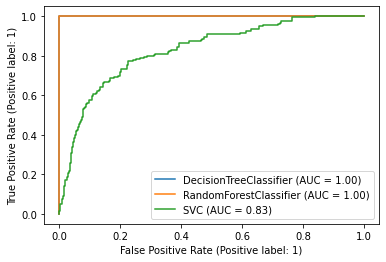

In [155]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

# how well our model works on training data 

disp = plot_roc_curve(dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


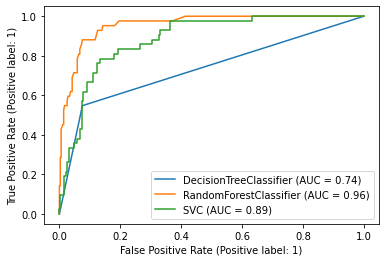

In [156]:
# how well our model works on testing data 

disp = plot_roc_curve(dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

## auc-roc curve for hyperparameter tuning

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [158]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [159]:
X_train_ns,X_test,y_train_ns,y_test=train_test_split(X,y,test_size=0.25,random_state=38)

In [165]:
# Decision Tree with hyperparameter
dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 20, min_samples_leaf= 1, min_samples_split= 5)
dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=20, min_samples_split=5)

In [166]:
# Random Forest with hyperparameter
rf=RandomForestClassifier(criterion= 'entropy', max_depth = 30, min_samples_leaf= 2, min_samples_split= 5,n_estimators= 50)
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50)

In [167]:
# SVC with Hyperparameter
svc=SVC(C=20,gamma=0.02)
svc.fit(X_train_ns,y_train_ns)

SVC(C=20, gamma=0.02)

In [168]:
dt.score(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
svc.score(X_train_ns,y_train_ns)
print('All model are trained')

All model are trained


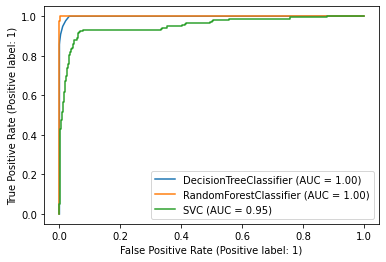

In [169]:
# how well our model works on training data 

disp = plot_roc_curve(dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


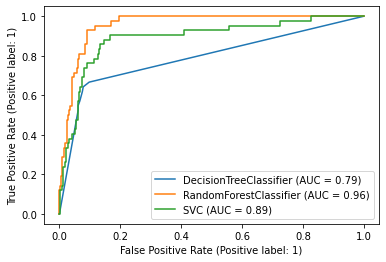

In [170]:
# how well our model works on testing data 

disp = plot_roc_curve(dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

#plot_roc_curve(gbdt,X_test,y_test,ax=disp.ax_)

#plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

In [ ]:
# so after seeing all the 3 model form auc roc curve i am concluding that Random Forest is best model for this perticular model instead of Decision tree and SVC